In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.18.1
pandas 0.24.2
sklearn 0.20.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_train_all.shape, y_train_all.shape)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)

In [5]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
#     model.add(keras.layers.Dense(100, activation='relu'))
#     model.add(kerasr.layers.BatchNormalization())
#     可以将激活函数放在批归一化后面    
    model.add(keras.layers.Dense(100))
    # 批归一化,以使每层的输入满足标准正态分布
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0

In [7]:
log_dir = './logs'
if not os.path.exists(log_dir):
    os.mkdir(log_dir)
model_file = os.path.join(log_dir, 'fashion_mnist_model.h5')    

callbacks = [
    keras.callbacks.TensorBoard(log_dir),
    keras.callbacks.ModelCheckpoint(model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 12s 225us/sample - loss: 0.9880 - accuracy: 0.6591 - val_loss: 0.5639 - val_accuracy: 0.8000
Epoch 2/20
55000/55000 [==============================] - 8s 152us/sample - loss: 0.6606 - accuracy: 0.7728 - val_loss: 0.5031 - val_accuracy: 0.8234
Epoch 3/20
55000/55000 [==============================] - 8s 152us/sample - loss: 0.5790 - accuracy: 0.8001 - val_loss: 0.4644 - val_accuracy: 0.8370
Epoch 4/20
55000/55000 [==============================] - 8s 152us/sample - loss: 0.5239 - accuracy: 0.8163 - val_loss: 0.4057 - val_accuracy: 0.8526
Epoch 5/20
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4855 - accuracy: 0.8307 - val_loss: 0.3895 - val_accuracy: 0.8554
Epoch 6/20
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4572 - accuracy: 0.8394 - val_loss: 0.3783 - val_accuracy: 0.8638
Epoch 7/20
55000/55000 [==========================

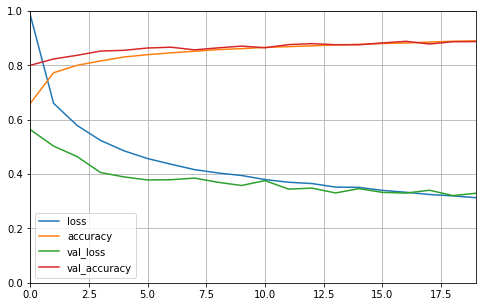

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3519961568713188, 0.8784]